In [145]:
#retirar warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_excel("./Dados/Fonte dos Dados.xlsx")

df_alunos = pd.read_excel("./Dados/Dados_Projeto_-_Alunos_Sirius.xlsx")

In [146]:
df_alunos['Cidade'] = df_alunos['Cidade'].str.lower()

df['nomeLocalidade'] = df['nomeLocalidade'].str.lower()

In [147]:
# check the values of each row for each column
n = df_alunos.nunique(axis=0)
print("Nº de valores unicos em cada coluna :\n",
      n)

Nº de valores unicos em cada coluna :
 Naturalidade                      46
Cidade                            37
Últimos estudos - Dados gerais    65
Escolaridade                       2
Situação do aluno                  3
FormaIngresso                      1
dtype: int64


In [148]:
# Contar a frequência de cada cidade
cidade_counts = df_alunos['Cidade'].value_counts()

# Criando um DataFrame a partir da série
df_cidade_counts = pd.DataFrame({
    'nomeLocalidade': cidade_counts.index,
    'quantidade de alunos': cidade_counts.values
})
# Adicionando uma coluna com 'Sim' ou 'Não' com base na quantidade de alunos
df_cidade_counts['Cidade tem Aluno'] = ['Sim' if x >= 1 else 'Não' for x in df_cidade_counts['quantidade de alunos']]

df_cidade_counts

,nomeLocalidade,quantidade de alunos,Cidade tem Aluno
0,são paulo,17,Sim
1,belo horizonte,12,Sim
2,campinas,5,Sim
3,rio de janeiro,5,Sim
4,osasco,3,Sim
5,santos,2,Sim
6,brasília,2,Sim
7,porto alegre,2,Sim
8,são josé dos campos,2,Sim
9,campo grande,2,Sim


In [149]:
df_merged = df.merge(df_cidade_counts, on='nomeLocalidade', how='left')
df_merged['Cidade tem Aluno'] = df_merged['Cidade tem Aluno'].fillna('Não')

In [150]:
df_merged.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",quantidade de alunos,Cidade tem Aluno
0,acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0,NaN,Não
1,assis brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0,NaN,Não
2,brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0,NaN,Não
3,bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0,NaN,Não
4,capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0,NaN,Não


In [151]:
df_merged['Cidade tem Aluno'].value_counts()

Não    5525
Sim      40
Name: Cidade tem Aluno, dtype: int64

In [152]:
# Seus dados e rótulos
X = df_merged.drop(['Cidade tem Aluno','quantidade de alunos','nomeLocalidade', 'estado'], axis=1)  # Dados sem a coluna alvo
y = df_merged['Cidade tem Aluno']  # Somente a coluna alvo


#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [153]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [154]:
# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X, y = undersample.fit_resample(X, y)

In [155]:
counts = np.bincount(y)

count_0 = counts[0]
count_1 = counts[1]

print(f"Contagem de 0: {count_0}")
print(f"Contagem de 1: {count_1}")


Contagem de 0: 40
Contagem de 1: 40


In [156]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [157]:
# Criando o modelo
pipeline = LogisticRegression()

# Treinando o modelo
pipeline.fit(X_train, y_train)

LogisticRegression()

In [158]:
# Matriz de confusão
y_pred = pipeline.predict(X_test)

matriz_confusao = confusion_matrix(y_test, y_pred)
matriz_confusao

array([[11,  1],
       [ 1, 11]], dtype=int64)

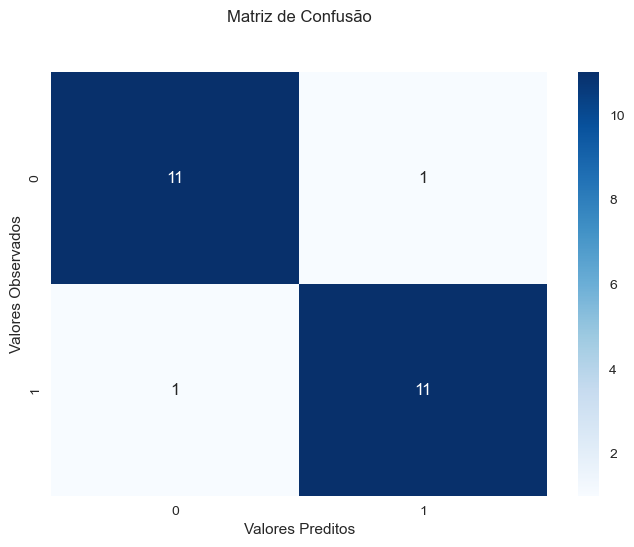

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



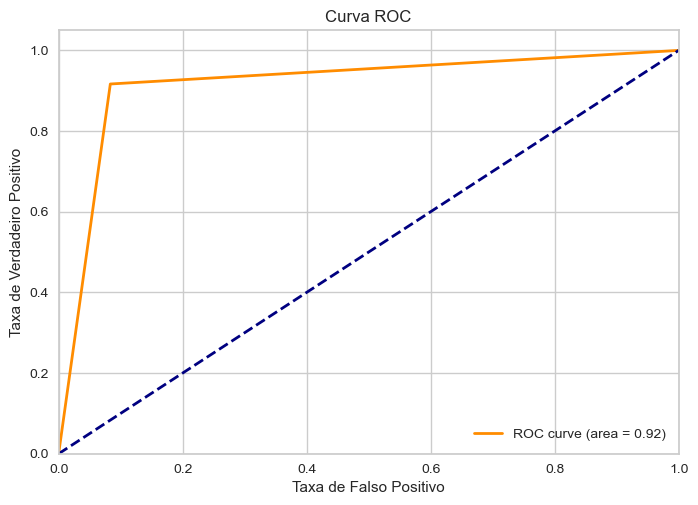

In [161]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


# Visualização
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [162]:
class DummyModel(object):

    def __init__(self, y_pred=None, y_prob=None):
        self.y_pred = y_pred
        self.y_prob = y_prob
        self._estimator_type = "classifier"
        self.classes_ = [0, 1]

    def predict(self, X):
        if self.y_pred is None:
            return self.y_pred
        return self.y_pred.values

    def predict_proba(self, X):
        if self.y_prob is None:
            return self.y_prob
        return self.y_prob.values

In [163]:
from sklearn.metrics import (
    ConfusionMatrixDisplay as plot_mdc, 
    RocCurveDisplay as plot_roc, 
    classification_report
)

In [164]:
def plot_confusion_matrix(y_true, y_prob, threshold=0.5, fontsize=26, figsize=(10, 10), cmap='Blues',values_format='d', **kwargs):
    original_fontsize = plt.rcParams['font.size']
    plt.rcParams['font.size'] = fontsize
    y_pred = (y_prob >= threshold).astype(int)
    print(classification_report(y_true, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt=values_format, cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    plt.rcParams['font.size'] = original_fontsize

In [165]:
def plot_roc_curve(y_true, y_prob, figsize=(10, 10), **kwargs):
    return plot_roc(
        estimator=DummyModel(y_prob=y_prob),
        X=None, y=y_true,
        ax=plt.figure(figsize=figsize).gca(),
        **kwargs
    )

In [166]:
def calculate_far_frr(y_prob, y_true, n_points=30, normalize=False, threshold=None):
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_prob[y_true == 0] >= t
        frr_pt = y_prob[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

In [167]:
def plot_far_frr(figsize=(15,10), grid=True, **kwargs):
    ffdf = calculate_far_frr(**kwargs)
    plt.figure(figsize=figsize)
    ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
    ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
    plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
    plt.grid(grid)
    plt.xlim(0, 1)
    plt.ylim(0, ffdf['plot'].max().max())
    plt.xlabel('threshold')
    plt.ylabel('count')
    plt.legend()
    return ffdf

In [168]:
def plot_binary_classifier_histogram(y_true, y_prob, dataset_label=None, threshold=None, **kwargs):
    bins = kwargs.get('bins', 8)
    alpha = kwargs.get('alpha', 0.4)
    linewidth = kwargs.get('linewidth', 0)
    figsize = kwargs.get('figsize', (15, 10))
    fontdict = kwargs.get('fontdict', {'size': 12})

    plt.figure(figsize=figsize)
    sns.histplot(
        y_prob[y_true == 0], color='red', label='y==0',
        bins=bins, alpha=alpha, linewidth=linewidth
    )
    sns.histplot(
        y_prob[y_true == 1], color='blue', label='y==1',
        bins=bins, alpha=alpha, linewidth=linewidth
    )
    if threshold is not None:
        plt.axvline(0.5, ls='--', color='#333333', label=f'decisão (threshold >= {threshold * 100:5.2f}%)')
    plt.xlabel('Probabilidade', fontdict={'size': 12})
    plt.ylabel('Contagem', fontdict={'size': 12})
    if dataset_label is not None:
        dataset_label = f' - {dataset_label}'
    plt.title(f'Estimativas {dataset_label}', fontdict={'size': 12})
    plt.grid(True)
    plt.legend()

In [169]:
X = X_train
y_true = y_train.flatten()
y = pd.DataFrame(
    dict(
        y_true=y_true,
        y_pred=pipeline.predict(X),
        y_prob=pipeline.predict_proba(X)[:, 1]
    ),
    index=X.index    
)

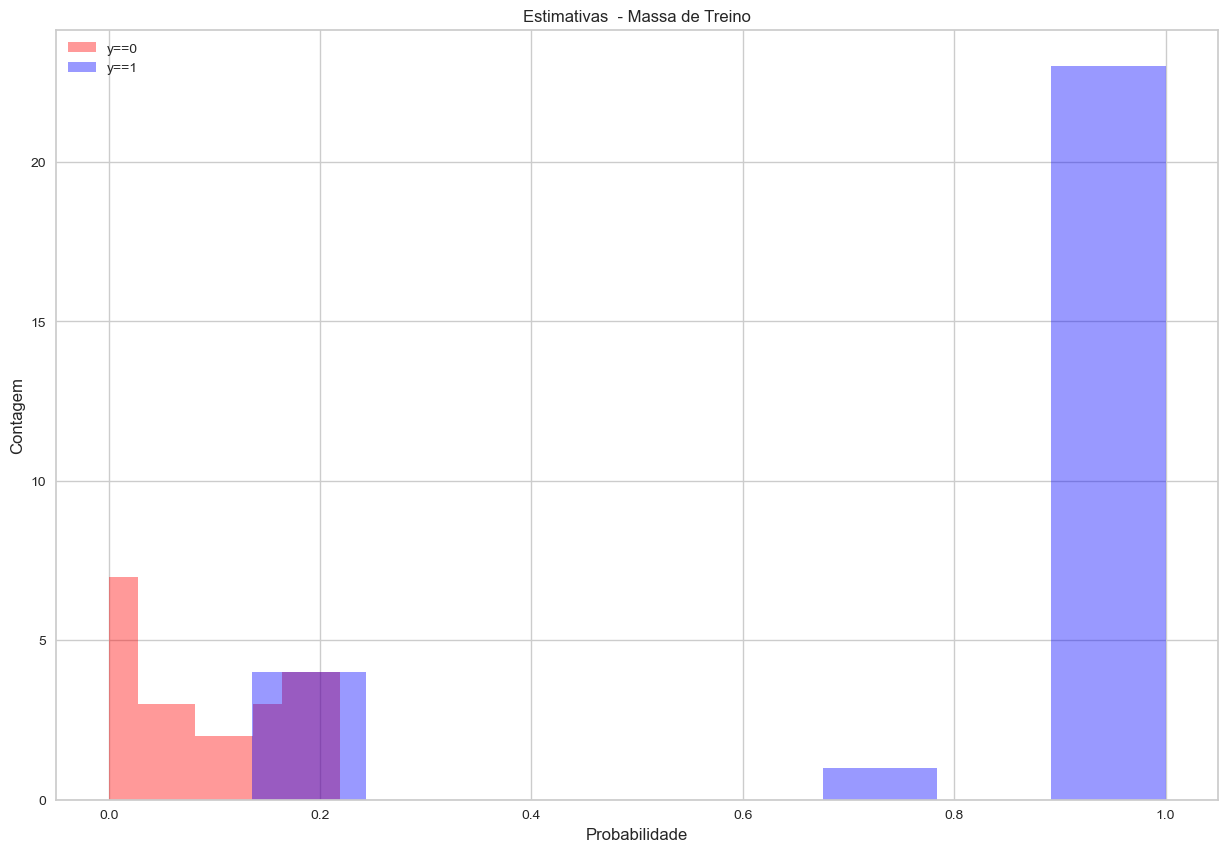

In [170]:
plot_binary_classifier_histogram(
    y_true=y.y_true, y_prob=y.y_prob, dataset_label='Massa de Treino', 
    bins=8, alpha=0.4, linewidth=0, grid=True,
    figsize=(15, 10)
)

0.20689655172413793

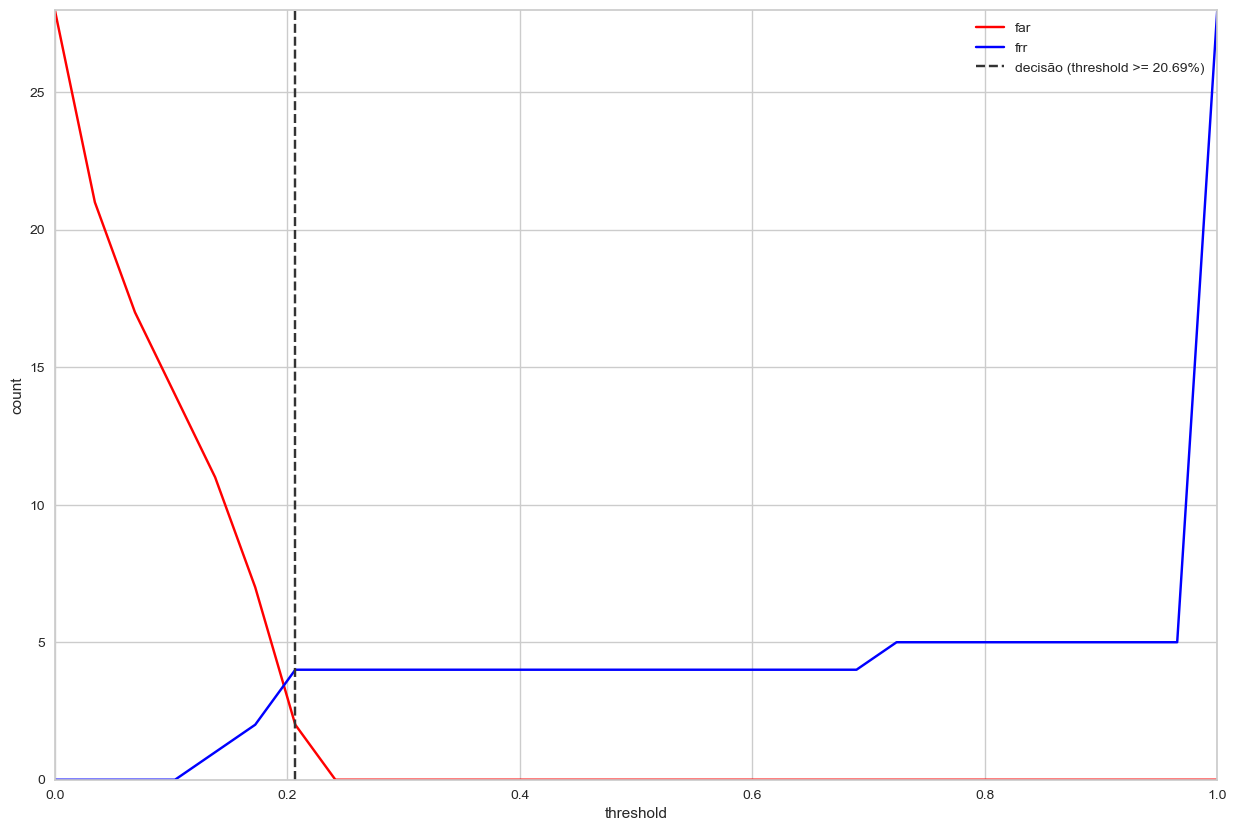

In [171]:
ffdf = plot_far_frr(
    y_true=y.y_true, y_prob=y.y_prob, 
    n_points=30, normalize=False, threshold=None, 
    figsize=(15, 10)
)
ffdf['optm']

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.86      0.92        28

    accuracy                           0.93        56
   macro avg       0.94      0.93      0.93        56
weighted avg       0.94      0.93      0.93        56



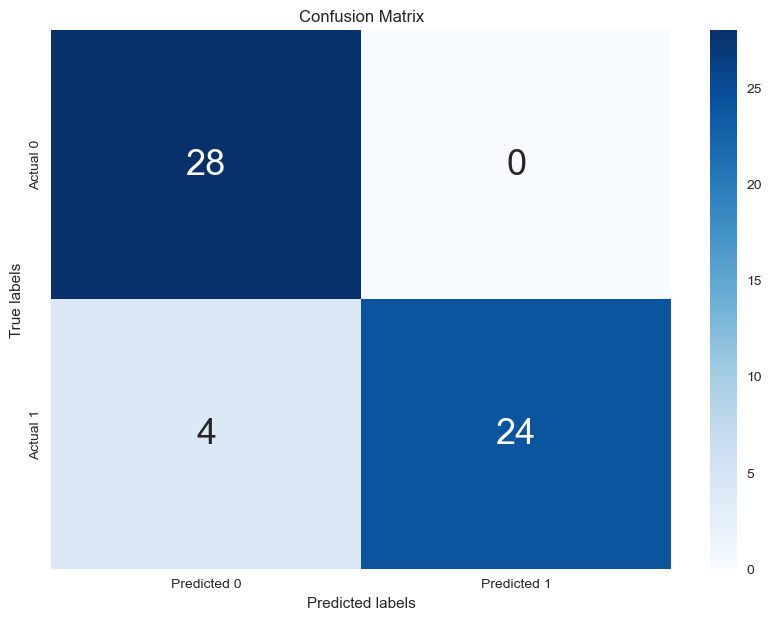

In [172]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=0.5, 
    fontsize=26, values_format='d'
)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.92      0.86      0.89        28

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



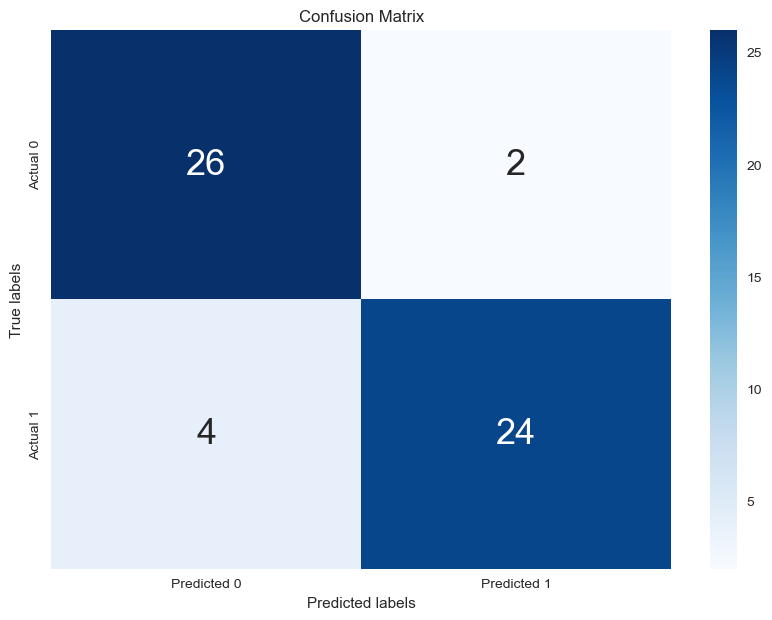

In [173]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=ffdf['optm'], 
    fontsize=26, values_format='d'
)

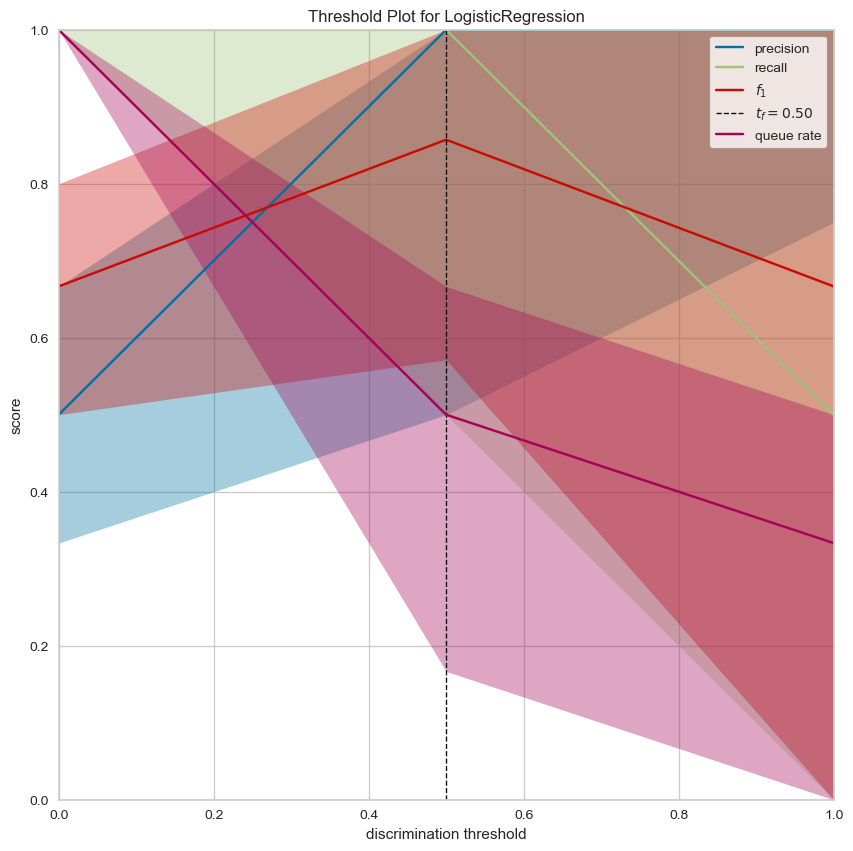

In [183]:
from yellowbrick.classifier.threshold import discrimination_threshold

f = plt.figure(figsize=(10, 10))
dt = discrimination_threshold(pipeline, X_train, y_train,n_trials=100, show=False)

### Avaliação em dados de teste

In [175]:
X = X_test
y_true = y_test.flatten()
y = pd.DataFrame(
    dict(
        y_true=y_true,
        y_pred=pipeline.predict(X),
        y_prob=pipeline.predict_proba(X)[:, 1]
    ),
    index=X.index    
)

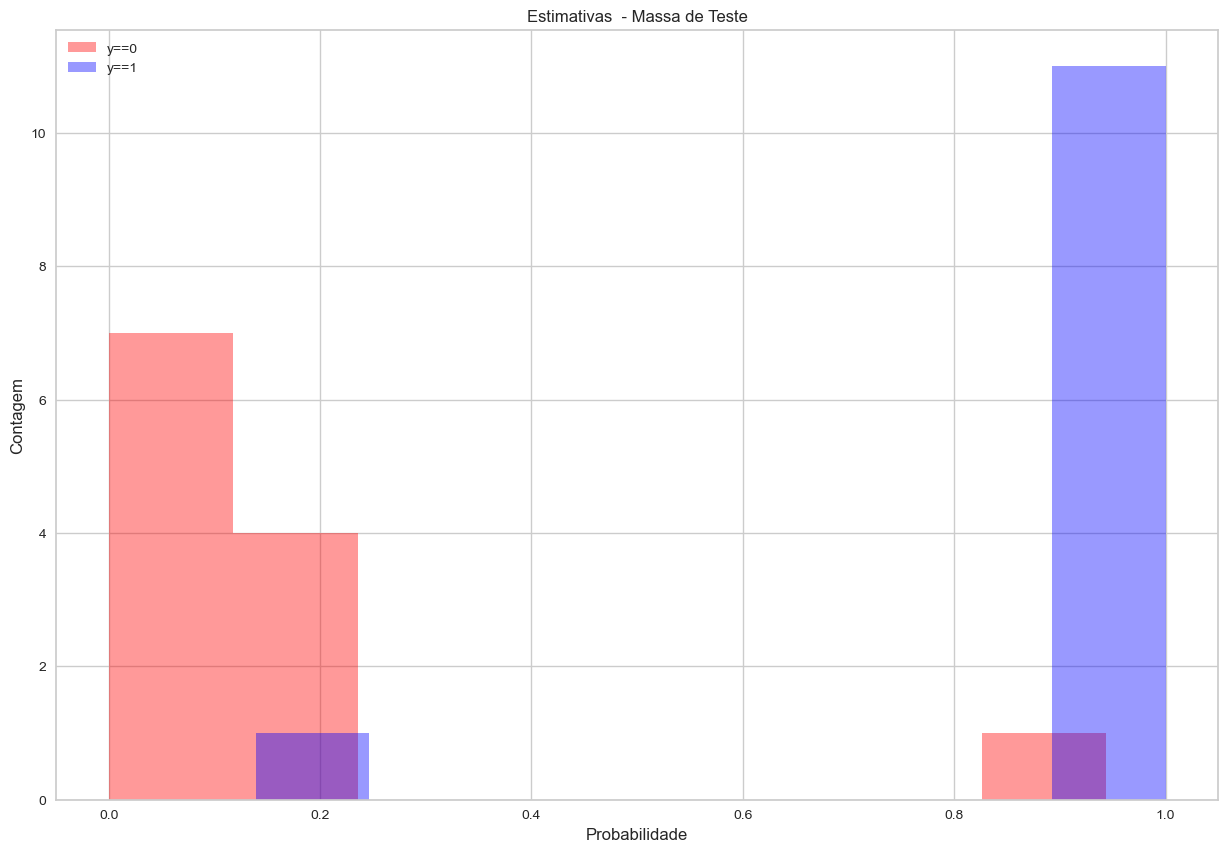

In [176]:
plot_binary_classifier_histogram(
    y_true=y.y_true, y_prob=y.y_prob, dataset_label='Massa de Teste', 
    bins=8, alpha=0.4, linewidth=0, grid=True,
    figsize=(15, 10)
)

0.19191919191919193

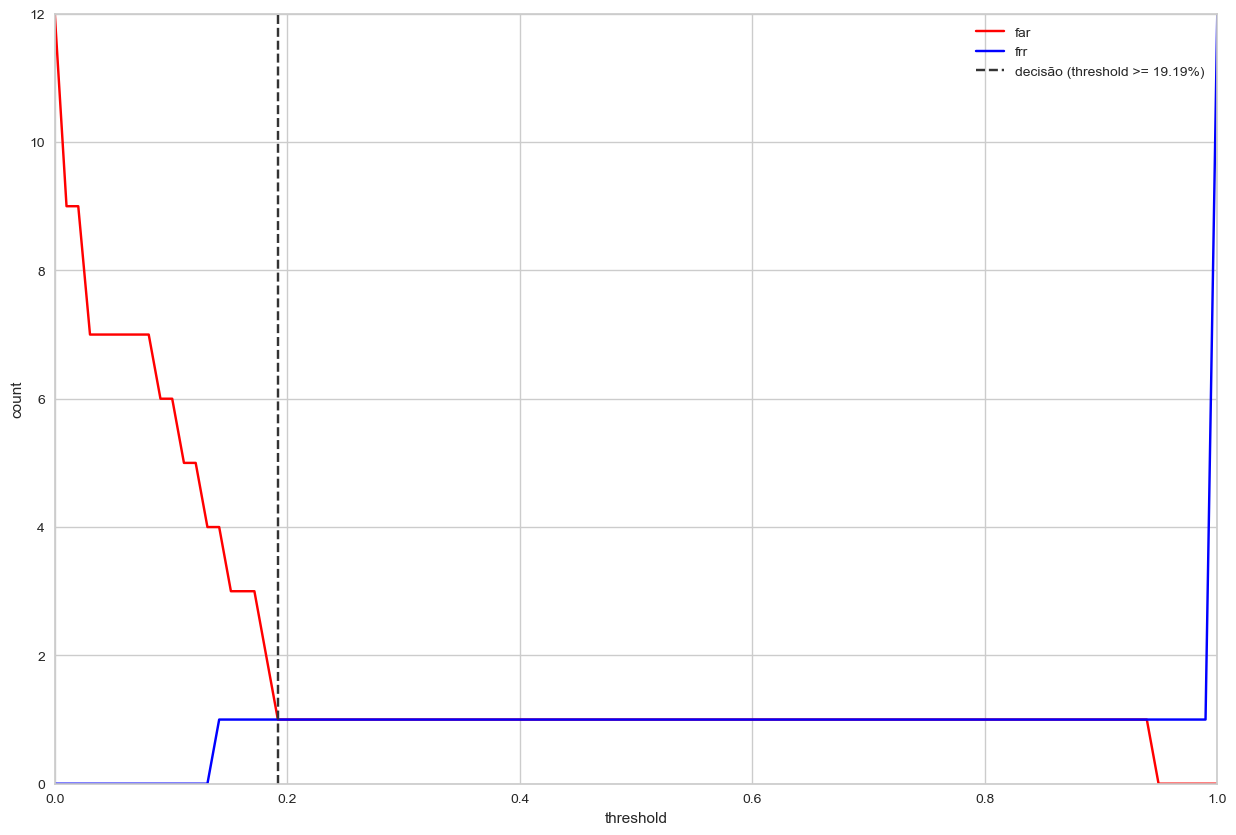

In [177]:
ffdf = plot_far_frr(
    y_true=y.y_true, y_prob=y.y_prob, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
ffdf['optm']

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



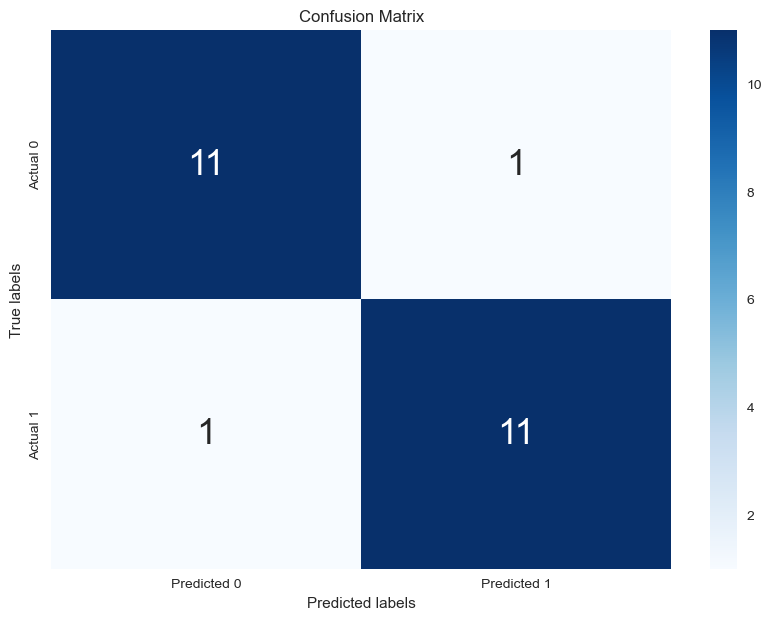

In [184]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=0.20689655172413793, 
    fontsize=26, values_format='d'
)